![](https://img.shields.io/badge/Autori:-Arcarese_|_Betto_|_David_|_Touimi-chocolate?style=flat)

# **Algoritmi di integrazione**

+ Questo notebook ha l'obbiettivo di studiare e realizzare due algoritmi di integrazione:

  - **Metodo dei Trapezi**
  - **Metodo di Cavalieri-Simpson**

+ #### Requisiti di progetto:

  - Modulo ***`numpy`*** → per avere accesso alle funzioni matematiche più comuni
  - Modulo ***`matplotlib.pyplot`*** → per la creazione di grafici

In [22]:
import matplotlib.pyplot as plt
import numpy as np

- #### Definizione della funzione ***`f(x)`***:

    - Per iniziare necessitiamo di una funzione che verrà definita nel seguente blocco di codice, qui è possibile utilizzare ogni funzione matematica presente nel modulo `numpy` come ***`math.sin(x)`*** o ***`math.sqrt(x)`***.


In [23]:
f = lambda x: np.sin(x**2)
# f = lambda x: np.e**(-x**2)
# f = lambda x: x**2

In [24]:
a = 0  # Limite inferiore
b = 3  # Limite superiore
n = 100  # Numero di sottointervalli, deve essere pari

## Regola dei Trapezi

In [25]:
def trapezoidal_rule(f, a, b, n):
    # calcolo larghezza di ciascun sottointervallo
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))

    x_values = np.linspace(a, b, n + 1)
    y_values = f(x_values)
    plt.xlim([a - .5, b + .5])
    plt.xlabel('x')
    plt.ylabel('y')

    for i in range(1, n):
        integral += f(a + i * h)
        plt.fill_between(
            [x_values[i], x_values[i+1]],
            [f(x_values[i]), f(x_values[i+1])],
            alpha=.5
        )

    # l'altezza è uguale per tutti i trapezi
    integral *= h

    x_values = np.linspace(a, b, 1000)
    plt.plot(x_values, f(x_values), label='Funzione')
    return plt, integral

In [26]:
plot, result = trapezoidal_rule(f, a, b, n)
print("Risultato metodo dei trapezi:", result)
plt.title(
    f'Grafico della funzione e regola del trapezio ' +
    f'(n={n})\nArea sottostante la curva: {result:.4f}'
)
plot.show()

Risultato metodo dei trapezi: 0.7731523134420729


## Regola di Simpson

In [27]:
def simpsons_rule(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("Il numero di suddivisioni deve essere pari per il metodo di Simpson")

    h = (b - a) / n
    integral = f(a) + f(b)

    x_values = np.linspace(a, b, n + 1)
    y_values = f(x_values)
    plt.xlim([a - .5, b + .5])
    plt.xlabel('x')
    plt.ylabel('y')

    for i in range(1, n, 2):
        integral += 4 * f(a + i * h) # valore maggiore
    for i in range(2, n-1, 2):
        integral += 2 * f(a + i * h) # valore ridotto

    x_values = np.linspace(a, b, 1000)
    x_sectors = np.array_split(x_values, n)
    for sector in x_sectors:
        plt.fill_between(
          sector,
          f(sector),
          alpha=0.5
        )

    # la posizione dispari ha più peso
    # i numeri non estremi hanno più peso
    # gli estremi hanno meno peso(1)
    # i numeri pari che sono gli estremi interni hanno peso(2) mentre i numeri dispari che sono del tutto interni hanno peso (4)

    integral *= h / 3 # come da formula

    x_values = np.linspace(a, b, 1000)
    plt.plot(x_values, f(x_values), label='Funzione')
    return plot, integral


Risultato metodo di Simpson: 0.7735633481503966


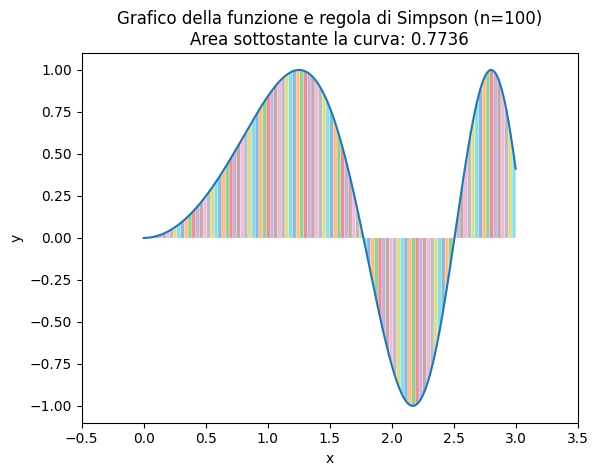

In [28]:
plot, result = simpsons_rule(f, a, b, n)
print("Risultato metodo di Simpson:", result)
plt.title(
    f'Grafico della funzione e regola di Simpson ' +
    f'(n={n})\nArea sottostante la curva: {result:.4f}'
)
plot.show()